In [2]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('numpy: {}'.format(numpy.__version__))
print('pandas: {}'.format(pandas.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.1 (tags/v3.8.1:1b293b6, Dec 18 2019, 22:39:24) [MSC v.1916 32 bit (Intel)]
numpy: 1.18.5
pandas: 1.0.5
matplotlib: 3.3.1
seaborn: 0.10.1
scipy: 1.5.0
sklearn: 0.23.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load the dataset
data = pd.read_csv('creditcard.csv')

In [5]:
#explore the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
print(data.shape)

(284807, 31)


In [7]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [8]:
data = data.sample(frac = 0.1, random_state = 1)

print(data.shape)

(28481, 31)


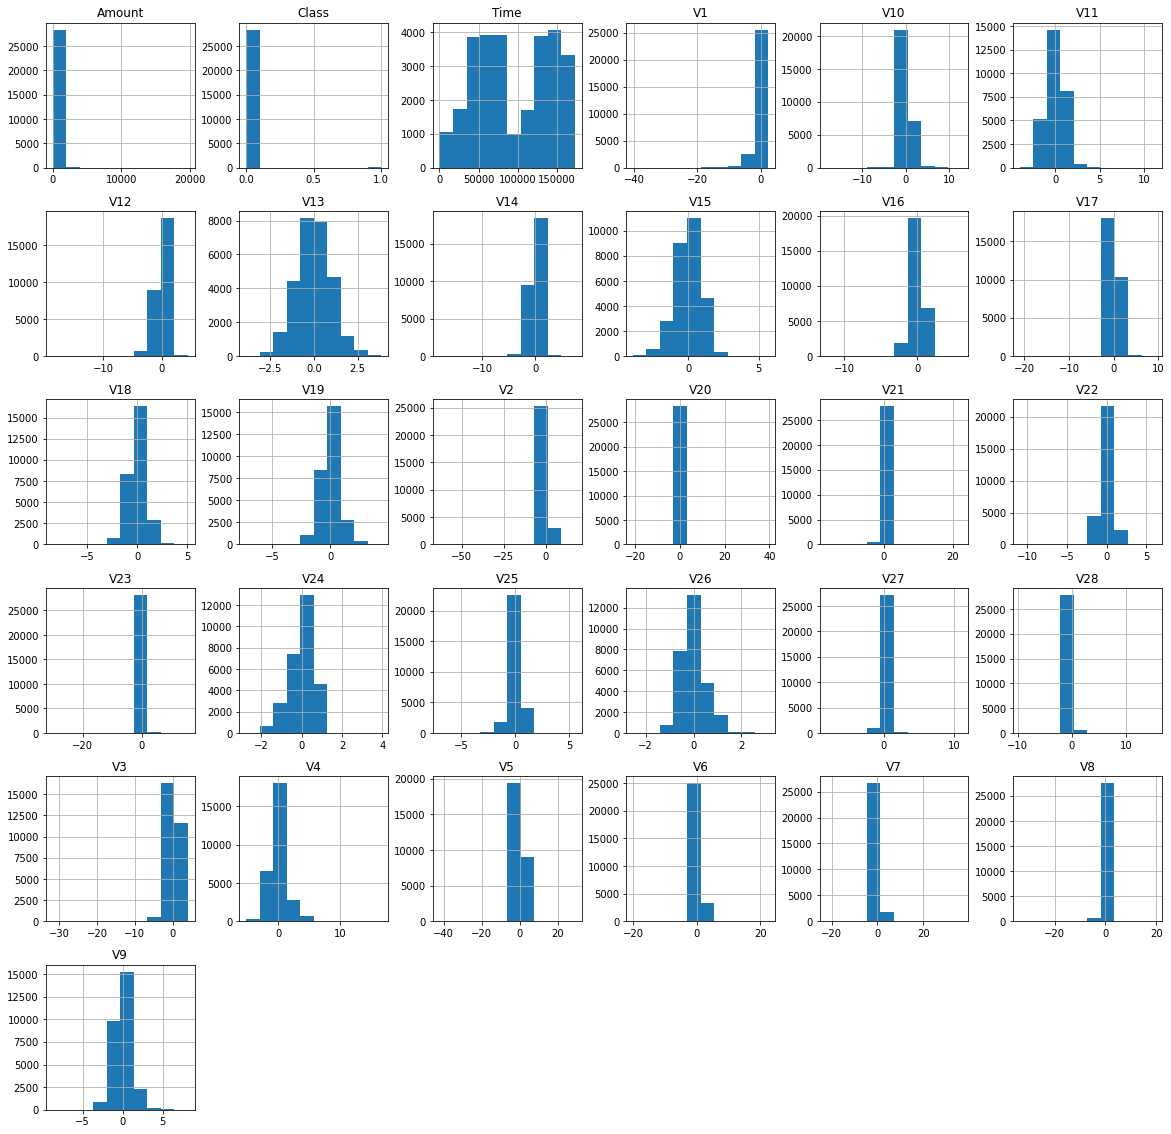

In [9]:
#plot histogram
data.hist(figsize = (20,20))
plt.show()

In [10]:
#determine number of fraud
fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(Valid))
print(outlier_fraction)

print('fraud cases: {}'.format(len(fraud)))
print('valid cases: {}'.format(len(Valid)))

0.0017234102419808666
fraud cases: 49
valid cases: 28432


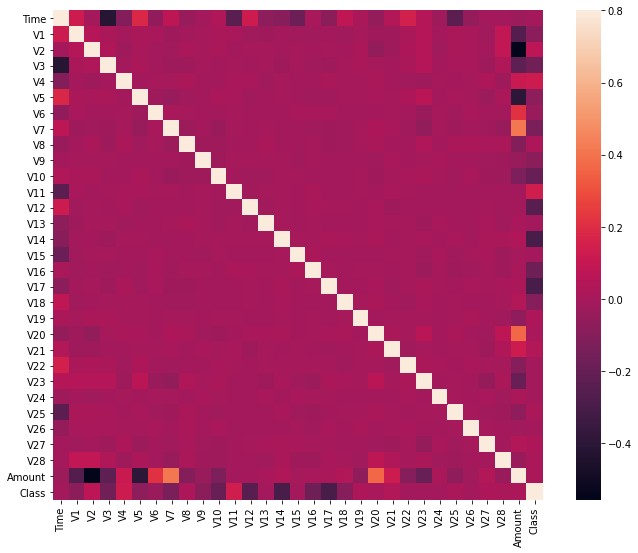

In [11]:
#correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax=.8, square = True)
plt.show()

In [12]:
#get all cols from datasets
columns = data.columns.tolist()

columns = [c for c in columns if c not in ["Class"]]

target = "Class"

X=data[columns]
Y=data[target]

print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [14]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state
state = 1

#define the outlier detection methods
classifiers = {
    "Isolation forest": IsolationForest(max_samples=len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [15]:
# Fit the model
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    #fit data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # rshape the prediction values tp 0 for valid 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    #Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

Isolation forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

